In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Датасет "Уровень самоубийств"

https://www.kaggle.com/stevenfeng26/improved-suicide-rate-19852016

**country** - страна

**year** - год

**sex** - пол

**age** - возраст:
 * 75+ 
 * 55-74
 * 35-54
 * 25-34
 * 15-24
 * 5-14

**suicides/100k** - количество самоубийств на 100 тысяч населения

**HDI** - индекс развития человеческого потенциала по годам 

**gdp_per_capita** - ВВП на душу населения

**generation** - поколение:

 * G.I. Generation - величайшее поколение (рождены в 1900 - 1927е гг.)
 * Silent - молчаливые (рождены в 20-40е годы)
 * Boomers - бумеры (рождены в 40 -60е гг.)
 * Generation X - поколение Х (рождены в 60-70е гг.)
 * Millenials - миллениалы (рождены в 80-90е гг.)
 * Generation Z - поколение Z/зумеры (рождены в 2000е г.)

**Region** - регион (для культуры)

**Assigned_To_Zone** - назначенная зона (для климата):

 * I =Temperate - умеренная

 * II=Mediterranean/subtropical - средиземноморская/тропический пояс

 * III=Hot Dry - жаркая сухая

 * IVa=Hot Humid/tropical zone - жаркая влажная/тропический пояс

 * IVb.Hot - жаркий

# Предварительные изучение и обработка данных

In [ ]:
df = pd.read_csv('final_table.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.rename(columns = {'suicides/100k pop' : 'suicides_100k', 'HDI for year' : 'HDI', 'Assigned To Zone' : 'Assigned_To_Zone'})
df.head()

,country,year,sex,age,suicides_100k,HDI,gdp_per_capita,generation,Region,Assigned_To_Zone
0,Argentina,1985,male,75+ years,55,0.694,3264,G.I. Generation,South/Latin America,II
1,Argentina,1985,male,55-74 years,24,0.694,3264,G.I. Generation,South/Latin America,II
2,Argentina,1985,male,35-54 years,12,0.694,3264,Silent,South/Latin America,II
3,Argentina,1985,female,55-74 years,9,0.694,3264,G.I. Generation,South/Latin America,II
4,Argentina,1985,male,25-34 years,7,0.694,3264,Boomers,South/Latin America,II


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           4224 non-null   object 
 1   year              4224 non-null   int64  
 2   sex               4224 non-null   object 
 3   age               4224 non-null   object 
 4   suicides_100k     4224 non-null   int64  
 5   HDI               4224 non-null   float64
 6   gdp_per_capita    4224 non-null   int64  
 7   generation        4224 non-null   object 
 8   Region            4224 non-null   object 
 9   Assigned_To_Zone  4224 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 330.1+ KB


In [ ]:
df['age'].unique()

array(['75+ years', '55-74 years', '35-54 years', '25-34 years',
       '15-24 years', '5-14 years'], dtype=object)

In [ ]:
df['generation'].unique()

array(['G.I. Generation', 'Silent', 'Boomers', 'Generation X',
       'Millenials', 'Generation Z'], dtype=object)

In [ ]:
df['Region'].unique()

array(['South/Latin America', 'Europe', 'Asia & Pacific', 'Arab States',
       'North America', 'Africa'], dtype=object)

In [ ]:
df['Assigned_To_Zone'].unique()

array(['II', 'IVa', 'IVb', 'I'], dtype=object)

In [ ]:
df['country'].unique()

array(['Argentina', 'Armenia', 'Australia', 'Azerbaijan', 'Bahrain',
       'Barbados', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'Cuba', 'Ecuador', 'El Salvador', 'Fiji', 'France', 'Georgia',
       'Germany', 'Greece', 'Guatemala', 'Guyana', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kuwait', 'Mexico', 'New Zealand', 'Nicaragua',
       'Oman', 'Panama', 'Paraguay', 'Philippines', 'Portugal', 'Qatar',
       'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Thailand',
       'Turkey', 'United States', 'Uruguay', 'Uzbekistan'], dtype=object)

In [ ]:
df[['Region', 'country']].groupby(['Region', 'country']).count()

Empty DataFrame
Columns: []
Index: [(Africa, South Africa), (Arab States, Bahrain), (Arab States, Kuwait), (Arab States, Oman), (Arab States, Qatar), (Asia & Pacific, Australia), (Asia & Pacific, Azerbaijan), (Asia & Pacific, Fiji), (Asia & Pacific, Japan), (Asia & Pacific, New Zealand), (Asia & Pacific, Philippines), (Asia & Pacific, Singapore), (Asia & Pacific, Sri Lanka), (Asia & Pacific, Thailand), (Asia & Pacific, Uzbekistan), (Europe, Armenia), (Europe, Bulgaria), (Europe, France), (Europe, Georgia), (Europe, Germany), (Europe, Greece), (Europe, Israel), (Europe, Italy), (Europe, Portugal), (Europe, Spain), (Europe, Turkey), (North America, Canada), (North America, United States), (South/Latin America, Argentina), (South/Latin America, Barbados), (South/Latin America, Belize), (South/Latin America, Brazil), (South/Latin America, Chile), (South/Latin America, Cuba), (South/Latin America, Ecuador), (South/Latin America, El Salvador), (South/Latin America, Guatemala), (South/Latin America, Guyana), (South/Latin America, Jamaica), (South/Latin America, Mexico), (South/Latin America, Nicaragua), (South/Latin America, Panama), (South/Latin America, Paraguay), (South/Latin America, Uruguay)]

Т.к. в данных отсутсвуют много стран, не представляется возможным проводить анализ в разрезе всех регионов. К дальнейшему анализу возьмём только страны Северной и Южной Америки - по ним есть наиболее полная информация.

In [ ]:
df = df.loc[(df['Region'] == 'North America') | (df['Region'] == 'South/Latin America')]

# Исследовательский анализ данных

**Динамика случаев суицида**

In [ ]:
df_suicides_region = df.pivot_table(index = 'year', columns = 'Region', values = 'suicides_100k', aggfunc = 'sum', fill_value = 0)
df_suicides_region

Region,North America,South/Latin America
year,,
1985,340,717
1990,340,1118
1995,325,1611
2000,274,1406
2005,268,1576
2010,277,1690
2011,275,1518
2012,282,1678
2013,287,1576


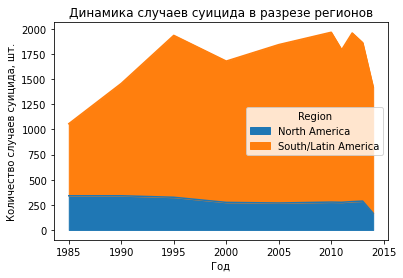

In [ ]:
df_suicides_region.plot(kind='area',
                        title='Динамика случаев суицида в разрезе регионов', 
                        xlabel='Год', 
                        stacked=True,
                        ylabel='Количество случаев суицида, шт.')

▶ Количество случаев суицида в Южной Америке в разы больше, чем в Северной.

▶ Пики и спады в регионах не совавдают.

▶ В Северной Америке динамика случаев суицида размеренная, без пиков и спадов (1 спад). В Южной Америке на протяжении всего периода наблюдается как периоды роста, так и периоды спада количества случаев суицида.


In [ ]:
df_suicides_zone = df.pivot_table(index = 'year', columns = 'Assigned_To_Zone', values = 'suicides_100k', aggfunc = 'sum', fill_value = 0)
df_suicides_zone

Assigned_To_Zone,I,II,IVa,IVb
year,,,,
1985,161,615,120,161
1990,159,613,333,353
1995,157,671,418,690
2000,133,729,374,444
2005,128,697,348,671
2010,125,721,390,731
2011,119,469,533,672
2012,122,731,425,682
2013,126,688,402,647


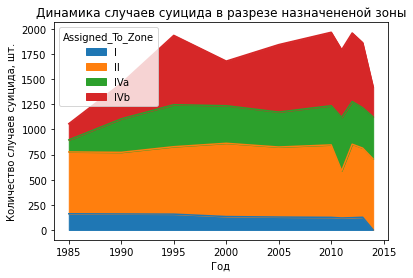

In [ ]:
df_suicides_zone.plot(kind='area',
                      title='Динамика случаев суицида в разрезе назначененой зоны', 
                      xlabel='Год', 
                      stacked=True,
                      ylabel='Количество случаев суицида, шт.')

#plt.xticks(np.arange(min(df['year']), max(df['year'])+1, 5.0)) - задать шаг оси

▶ Динамика в разрезе зон отражает картину в разрезе регионов, что логично, ведь оба региона лежат в своих зонах: Северная Амекрика в регионе I, здесь динамика плавная, а в регионах II и IV повторяет динамику Южной Америки.

▶ Резкий спад после 2010г. (прорвал) наблюдается во всех зонах Южной Америки, но рост в 1990-1995 гг. наиболее резкий в зоне IVb, также как и спад в 1995-2000. Зона IVb имеет более резкую динамику.  

In [ ]:
df_suicides_sex = df.pivot_table(index = 'year', columns = 'sex', values = 'suicides_100k', aggfunc = 'sum', fill_value = 0)
df_suicides_sex

sex,female,male
year,,
1985,168,889
1990,263,1195
1995,357,1579
2000,268,1412
2005,321,1523
2010,334,1633
2011,297,1496
2012,335,1625
2013,311,1552


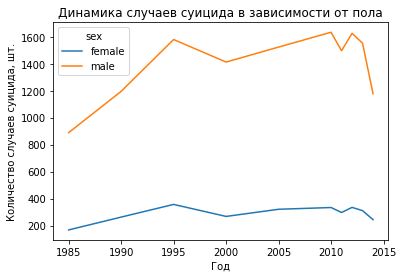

In [ ]:
df_suicides_sex.plot(title='Динамика случаев суицида в зависимости от пола', 
                     xlabel='Год', 
                     ylabel='Количество случаев суицида, шт.')

▶ Динамика случаев суициада среди женщин и мужчин имеет одинаоквый характер: спады и рост происходил одинакого, но среди мужчин случаев суицида значительно больше, рост и падения имеют более крутой наклон.

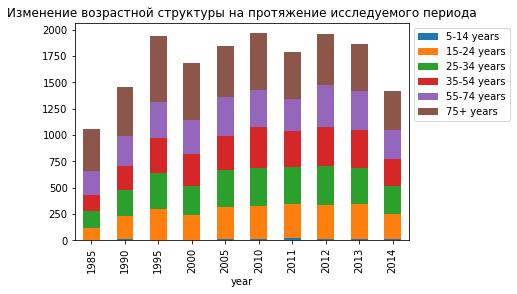

In [ ]:
df_suicides_age = df.pivot_table(index = 'year', columns = 'age', values = 'suicides_100k', aggfunc = 'sum', fill_value = 0)
df_suicides_age = df_suicides_age[['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']]
df_suicides_age.plot(kind='bar', stacked=True, title='Изменение возрастной структуры на протяжение исследуемого периода')
plt.legend(bbox_to_anchor=(1, 1))

▶ На протяжении исследуемого периода соотношение возрастных групп не меняется. (Ожидала, что будет заментный скачок в возрастной группе 15-24, но его не наблюдается).

**Топ суицидов**

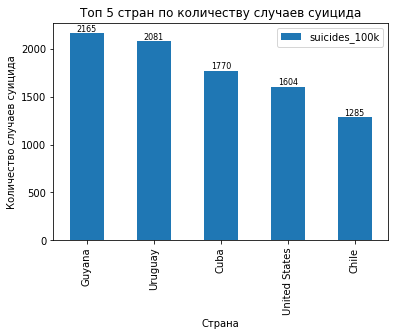

In [ ]:
df_top_country = df[['country', 'suicides_100k']].groupby(['country']).sum().sort_values(by='suicides_100k', ascending=False).head(5)

df_top_country.plot(kind='bar', 
                    title='Топ 5 стран по количеству случаев суицида',
                    xlabel='Страна',
                    ylabel='Количество случаев суицида')

for i, val in enumerate(df_top_country.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':8})

▶  Несмотря на то, что в Северной Америке самоубийств в разв меньше, чем в Южной, США на 4ом месте в топ-5 стран по количеству самоубийств.

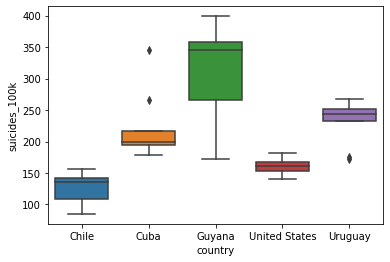

In [ ]:
# Группируем таблицу так, чтобы 1 наблюдение было количество самоубийств в стране за год
df_group = df[['country', 'year', 'suicides_100k', 'HDI', 'gdp_per_capita']].groupby(['country', 'year']) \
              .agg({'suicides_100k': 'sum', 'HDI': 'mean', 'gdp_per_capita':'mean'}).reset_index()
              
df_top_country = df_top_country.reset_index()

sns.boxplot(x="country", y="suicides_100k", data=df_group[df_group['country'].isin(df_top_country['country'])])

▶ Из топ-5 стран по количеству самоубийств выделяется Гайяна - очень большой разброс и медианное  количество самоубийств в год гораздо выше, чем у других стран в топе. Данные по Гайяне можно сказать зашкаливают - минимальное количество самоубийств в Гайяне больше, чем медианное значение США или Чили.

▶ На Кубе были 2 года, когда количество самоубийств резко превышало остальные годы. Вероятно это выбросы в данных. Похожая ситуация в Уругвае - есть значение, когда количество самоубийст гораздно ниже привычного минимума. Возможно выброс. 


**Взаимосвязи**

Text(0.5, 1.0, 'Взаимосвязь между количеством самоубийств, ВВП и HDI')

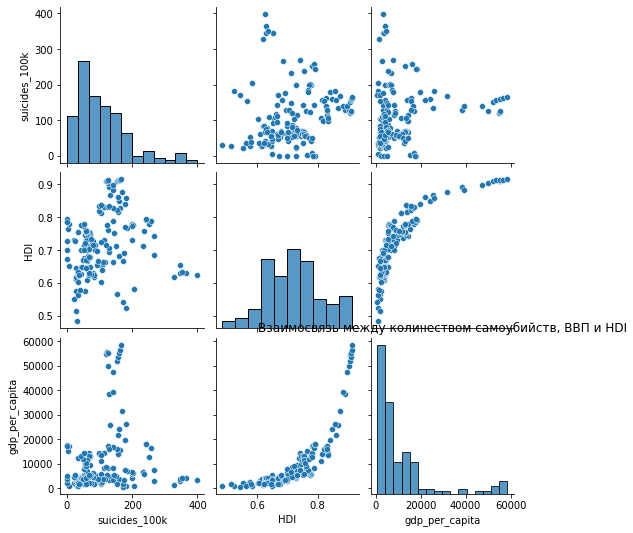

In [ ]:
sns.pairplot(df_group[['suicides_100k', 'HDI', 'gdp_per_capita']])
plt.title('Взаимосвязь между количеством самоубийств, ВВП и HDI')

▶ Чем выше ВВП, тем выше индекс человеческого потенциала (HDI).

▶ Между HDI и количеством самоубийств не прослеживается взаимосвязи, как и между ВВП и количеством самоубийств. Однако можно заметить, что наибольшее количество самоубийст при низком ВВП, а после 30000 ВВП количество самоубийств держится на одном уровне (напрёд могу сказать, что это Канада и США, проверенно).

Text(0.5, 1.0, 'Распределение количества самоубийств')

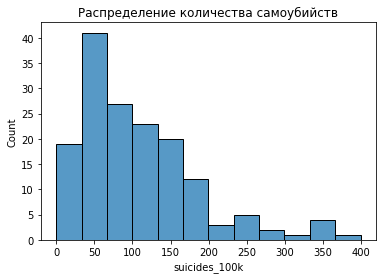

In [ ]:
sns.histplot(df_group['suicides_100k'])
plt.title('Распределение количества самоубийств')

▶ Наибольшее значение количества самоубийств по странам в год - 50. Более 200 за год встречается гораздо реже.

Text(0.5, 1.0, 'Тепловая карта топ-стран и возрастных групп')

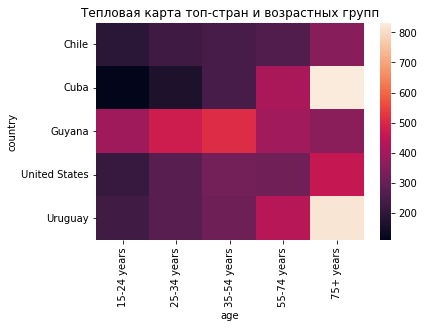

In [ ]:
df_top_country = df_top_country.reset_index()
df_country_age = df[(df['country'].isin(df_top_country['country'])&(df['age'] != '5-14 years'))].pivot_table(index = 'country', columns = 'age', values = 'suicides_100k', aggfunc = 'sum', fill_value = 0)
df_country_age
sns.heatmap(df_country_age)
plt.title('Тепловая карта топ-стран и возрастных групп')

▶ На Кубе  и в Уругвае значительная часть самоубийств - это группа 75+ (вероятно эти странны выводят группу  75+ на первое место с структуре самоубийств по возрастам (см.график ниже).

▶ В Гайяне тоже уникальная ситуация - здесь преобладают группы от 15 до 54 лет, когда в остальных странах 55-75+. 

**Струткура самоубийств**

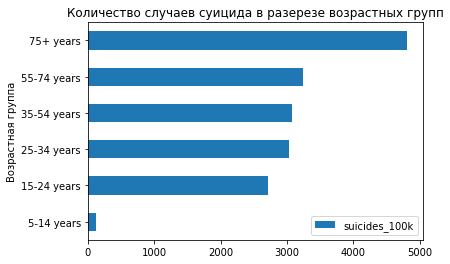

In [ ]:
df_age = df[['age', 'suicides_100k']].groupby(['age']).sum().sort_values(by='suicides_100k')
df_age.plot(kind='barh', 
                    title='Количество случаев суицида в разерезе возрастных групп',
                    xlabel='Возрастная группа',
                    ylabel='Количество случаев суицида')

▶ Преобладающая возрастная группа по количеству самоубийств - 75+. Остальные возрастные группы (за исключением 5-14 лет) примерно одинаоквы.

In [ ]:
!pip install squarify
import squarify 

Text(0.5, 1.0, 'Доля поколений в общем количестве самоубийств')

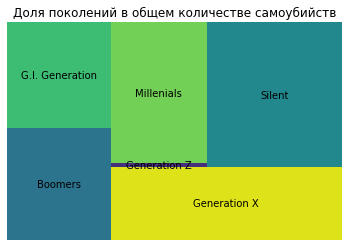

In [ ]:
df_generation = df[['generation', 'suicides_100k']].groupby(['generation']).sum()
a = df_generation.index.get_level_values(0).tolist()
b = list(df_generation['suicides_100k'])
squarify.plot(sizes=b, label=a, alpha=1)
plt.axis('off')
plt.title('Доля поколений в общем количестве самоубийств')

# График оказался плохочитаемым. Построен ради инетерса